# Тестирование датасетов

## Генерация датасетов

In [52]:
!pip install matplotlib numpy pandas

Looking in indexes: https://pypi.k.avito.ru/pypi/, https://pypi.python.org/pypi/

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

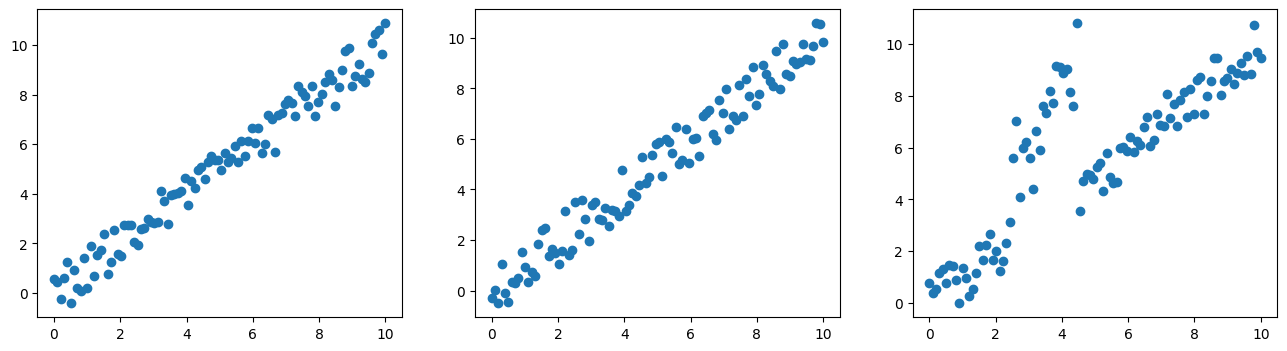

In [54]:
def make_ds(broken=False):
    xs = np.linspace(0, 10, 100)
    ys = xs + np.random.random(100)*2-1

    if broken:
        ys[25:45] *= 2

    return xs.reshape((-1, 1)), ys

xs1, ys1 = make_ds(False)
xs2, ys2 = make_ds(False)
xs3, ys3 = make_ds(True)

_, axes = plt.subplots(1, 3, figsize=(16,4))

axes[0].scatter(xs1, ys1)
axes[1].scatter(xs2, ys2)
_ = axes[2].scatter(xs3, ys3)

## Обучение модели

In [55]:
!pip install scikit-learn

Looking in indexes: https://pypi.k.avito.ru/pypi/, https://pypi.python.org/pypi/

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(xs1, ys1)

LinearRegression()

In [59]:
def df_score(xs, ys):
    return model.score(xs, ys)

In [60]:
scores = pd.DataFrame([df_score(xs1, ys1), df_score(xs2, ys2), df_score(xs3, ys3)], index=["df1", "df2", "df3"], columns=["score"])

scores


,score
df1,0.968832
df2,0.956734
df3,0.622452


## Тестирование моделей

In [61]:
!pip install ipytest

Looking in indexes: https://pypi.k.avito.ru/pypi/, https://pypi.python.org/pypi/

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [62]:
import ipytest

ipytest.autoconfig()

In [63]:
%%ipytest

MIN_SCORE = 0.9

def test_df1():
    score = df_score(xs1, ys1)

    assert score > MIN_SCORE

def test_df2():
    score = df_score(xs2, ys2)

    assert score > MIN_SCORE

def test_df3():
    score = df_score(xs3, ys3)

    assert score > MIN_SCORE


..F                                                                                          [100%]
============================================= FAILURES =============================================
_____________________________________________ test_df3 _____________________________________________

    def test_df3():
        score = df_score(xs3, ys3)
    
>       assert score > MIN_SCORE
E       assert 0.6224524147700954 > 0.9

/var/folders/m4/ywt1lgjs6vd0t0xzl5wwxllc0000gn/T/ipykernel_71191/3603795496.py:16: AssertionError
===================================== short test summary info ======================================
FAILED t_90fb3c968b7e43bf846d9c6827d3d3b5.py::test_df3 - assert 0.6224524147700954 > 0.9
1 failed, 2 passed in 0.04s


## Вывод

Тестирование 3-его датасета завершилось ошибкой, так как показатель R2 меньше минимально допустимого 0.62 < 0.9.
Успешно выявлен датасет с сильным шумом в данных.